In [0]:
from fastai import *
from fastai.tabular import *

In [0]:
from google.colab import drive
drive.mount('/content/gdrive', force_remount=True)
root_dir = "/content/gdrive/My Drive/"

In [0]:
from tqdm import tqdm

In [0]:
path = Path(root_dir)
csv_path = path/'flight'



In [0]:
procs = [Normalize]
dep_var = 'label'


### 4类_8w数据

In [0]:
df_4 = pd.read_csv(path/'flight'/'selected_data_4_8w.csv')

In [0]:
df_4.drop(columns = ['Unnamed: 0'])
train_df_4 = df_4[:int(len(df_4)*0.7)]
test_df_4 = df_4[int(len(df_4)*0.7):]

In [0]:
df_4['label'].value_counts()

B    47870
A    24309
C    15224
D       22
Name: label, dtype: int64

In [0]:
data4 = TabularDataBunch.from_df(path =csv_path, df = train_df_4,test_df = test_df_4, dep_var = dep_var,valid_idx = range(int(len(train_df_4)*0.8), len(train_df_4)), procs=procs)

In [0]:
data4.save("data4")

In [0]:
learn4 = tabular_learner(data4, layers=[1000,500], ps=[0.001,0.01], emb_drop=0.04, metrics = accuracy)

In [0]:
learn4.model

TabularModel(
  (embeds): ModuleList()
  (emb_drop): Dropout(p=0.04)
  (bn_cont): BatchNorm1d(13, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (layers): Sequential(
    (0): Linear(in_features=13, out_features=1000, bias=True)
    (1): ReLU(inplace)
    (2): BatchNorm1d(1000, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (3): Dropout(p=0.001)
    (4): Linear(in_features=1000, out_features=500, bias=True)
    (5): ReLU(inplace)
    (6): BatchNorm1d(500, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (7): Dropout(p=0.01)
    (8): Linear(in_features=500, out_features=4, bias=True)
  )
)

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


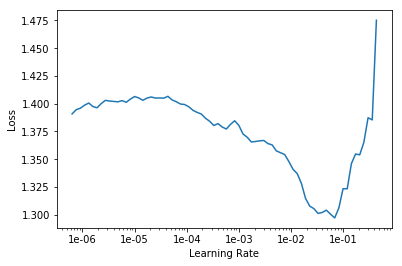

In [0]:
learn4.lr_find()
learn4.recorder.plot()

In [0]:
learn4.fit_one_cycle(10, max_lr = 1e-02, wd =0.1)

epoch,train_loss,valid_loss,accuracy,time
0,0.845419,0.829240,0.633742,00:22
1,0.805706,0.806560,0.645180,00:23
2,0.799511,0.843390,0.615196,00:22
3,0.789440,0.802316,0.644771,00:23
4,0.778820,0.766109,0.663725,00:23
5,0.766770,0.769082,0.660539,00:22
6,0.735177,0.734001,0.679657,00:23
7,0.703778,0.697801,0.703758,00:23
8,0.668689,0.660491,0.715605,00:23
9,0.666042,0.656994,0.715931,00:23


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


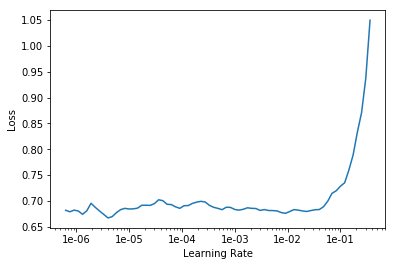

In [0]:
learn4.lr_find()
learn4.recorder.plot()

In [0]:
learn4.fit_one_cycle(5, max_lr = 1e-03, wd =0.1)

epoch,train_loss,valid_loss,accuracy,time
0,0.669536,0.651693,0.721569,00:23
1,0.687999,0.659364,0.718056,00:24
2,0.647870,0.636893,0.729902,00:24
3,0.639693,0.626245,0.731454,00:24
4,0.617569,0.624267,0.735376,00:25


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


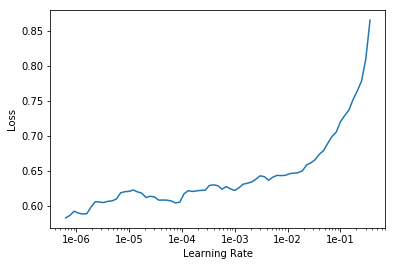

In [0]:
learn4.lr_find()
learn4.recorder.plot()

In [0]:
learn4.fit_one_cycle(5, max_lr = 1e-04/2, wd =0.1)

epoch,train_loss,valid_loss,accuracy,time
0,0.630533,0.623019,0.732680,00:25
1,0.636716,0.625068,0.732190,00:26
2,0.620448,0.621985,0.735948,00:26
3,0.617460,0.620404,0.735212,00:26
4,0.631124,0.621126,0.737908,00:26


In [0]:
learn4.save("learn4_stage1")

In [0]:
learn4.fit_one_cycle(5,1e-06)

epoch,train_loss,valid_loss,accuracy,time
0,0.629300,0.619548,0.736765,00:27
1,0.637169,0.621076,0.734559,00:27
2,0.638140,0.617995,0.736029,00:28
3,0.633194,0.618616,0.735866,00:27
4,0.629008,0.616848,0.738235,00:27


In [0]:
learn4.save("learn4_stage2")

In [0]:
test_df_4

,Unnamed: 0,month,day,dayofweek,airline,flight_number,tail_number,origin_airport,destination_airport,scheduled_departure,scheduled_time,distance,scheduled_arrival,label
61197,61197,12,20,7,6,5443,609,279,256,2240,60,199,2340,B
61198,61198,3,5,4,11,5675,3951,68,107,1700,105,463,1845,C
61199,61199,3,3,2,11,4629,1618,79,107,1622,113,569,1815,C
61200,61200,4,10,5,6,6501,1479,279,177,1935,105,337,2120,A
61201,61201,4,25,6,2,189,1955,178,87,825,75,282,940,B
61202,61202,2,9,1,11,5015,2892,203,183,600,77,195,717,A
61203,61203,2,21,6,9,4307,1533,21,239,2040,125,666,2245,B
61204,61204,2,24,2,11,2529,235,117,87,1645,130,737,1855,A
61205,61205,11,11,3,1,1218,403,229,152,2106,171,925,2357,A
61206,61206,6,15,1,11,4960,2435,260,183,1712,77,292,1829,B


In [0]:
a, _ = learn4.get_preds(ds_type = DatasetType.Test)

In [0]:
test_list_4 = list(test_df_4["label"])

In [0]:
def accu(cat,pred_list, test_list):
  cat_cnt = 0
  cat_real_cnt = 0
  cat_right_cnt = 0
  for i,j in zip(pred_list, test_list):
    if i == cat:
      cat_cnt+=1
      if i==j:
        cat_right_cnt += 1
    if j ==cat:
      cat_real_cnt+=1
  p = cat_right_cnt/cat_cnt
  r = cat_cnt/cat_real_cnt
  f1 = 2*p*r/(p+r)
  print(f"{cat}的准确率是{p}")
  print(f"{cat}的召回率是{r}")
  print(f"{cat}的F值是{f1}")


In [0]:
accu("A")
accu("B")
accu("C")
# accu("D")

A的准确率是0.6911558259241928
A的召回率是0.8773778568495962
B的准确率是0.7771876416866378
B的召回率是1.067999446596569
C的准确率是0.6525810872544541
C的召回率是0.9813943062093701


In [0]:
def f(a, p,r):
  print(str(a)+f"的f1值为{2*p*r/(p+r)}")
  
f("A",0.6911558259241928,0.8773778568495962 )
f("B",0.7771876416866378,1.067999446596569)
f("C",0.6525810872544541,0.9813943062093701)

A的f1值为0.7732123625501198
B的f1值为0.8996767606858785
C的f1值为0.7839033144970313


### 4类_100w数据

In [0]:
df_4_100 = pd.read_csv(path/'flight'/'selected_data_4_100w.csv')

In [0]:
df_4_100.drop(columns = ['Unnamed: 0'])
train_df_4_100 = df_4_100[:int(len(df_4_100)*0.7)]
test_df_4_100 = df_4_100[int(len(df_4_100)*0.7):]

In [0]:
df_4_100['label'].value_counts()

3    345442
5    263785
4    217222
2    173551
Name: label, dtype: int64

In [0]:
data4_100 = TabularDataBunch.from_df(path =csv_path, df = train_df_4_100,test_df = test_df_4_100, dep_var = dep_var,valid_idx = range(int(len(train_df_4_100)*0.8), len(train_df_4_100)), procs=procs)

In [0]:
learn4_100 = tabular_learner(data4_100, layers=[1000,500], ps=[0.001,0.01], emb_drop=0.04, metrics = accuracy)

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


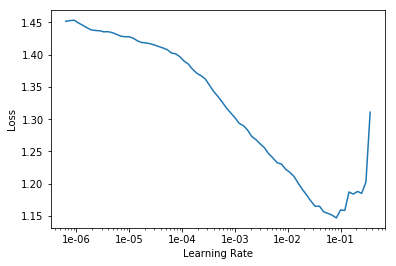

In [0]:
learn4_100.lr_find()
learn4_100.recorder.plot()

In [0]:
learn4_100.fit_one_cycle(5, max_lr = 1e-02/2, wd = 0.2)

epoch,train_loss,valid_loss,accuracy,time
0,0.393795,0.650640,0.728414,04:00
1,0.473249,0.625323,0.738021,04:24
2,0.453478,0.780479,0.661571,06:18
3,0.416088,0.490444,0.751407,06:31
4,0.334150,0.263340,0.918929,07:23


In [0]:
learn4_100.save("lear4_100_stage1")

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


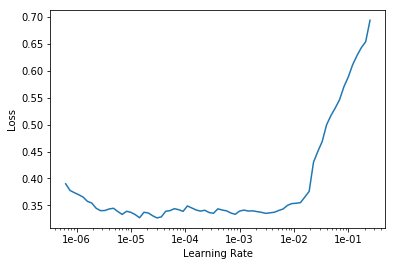

In [0]:
learn4_100.lr_find()
learn4_100.recorder.plot()

In [0]:
learn4_100.fit_one_cycle(5, max_lr = 1e-04, wd = 0.2)

epoch,train_loss,valid_loss,accuracy,time
0,0.356162,0.230943,0.939000,08:39
1,0.330665,0.261954,0.913300,08:12
2,0.324019,0.229564,0.935614,08:03
3,0.334019,0.289914,0.885079,08:17
4,0.328319,0.293398,0.883250,08:17


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


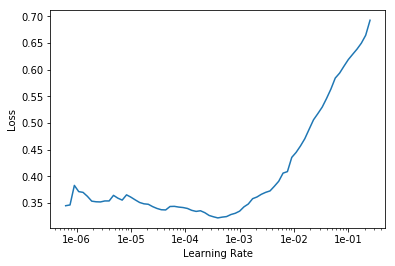

In [0]:
learn4_100.lr_find()
learn4_100.recorder.plot()

In [0]:
learn4_100.fit_one_cycle(5, max_lr = 1e-05, wd = 0.2)

epoch,train_loss,valid_loss,accuracy,time
0,0.313323,0.256101,0.905493,08:27
1,0.314101,0.259932,0.910879,08:29
2,0.303452,0.267482,0.897429,08:33
3,0.318320,0.244254,0.916686,08:21
4,0.313786,0.223727,0.931900,08:12


In [0]:
learn4_100.save("lear4_100_stage2")

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


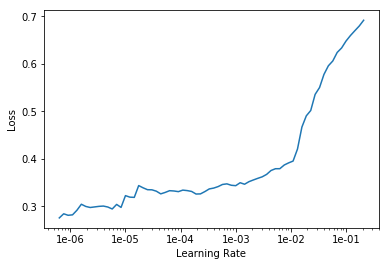

In [0]:
learn4_100.lr_find()
learn4_100.recorder.plot()

In [0]:
pred, _ = learn4_100.get_preds(ds_type = DatasetType.Test)

In [0]:
test_df_4_100

,Unnamed: 0,month,day,dayofweek,airline,flight_number,tail_number,origin_airport,destination_airport,scheduled_departure,departure_time,departure_delay,taxi_out,wheels_off,scheduled_time,elapsed_time,air_time,distance,wheels_on,taxi_in,scheduled_arrival,arrival_time,label
700000,700000,9,30,3,9,1820,270,175,223,650,646,-4,18,704,90,92,67,407,811,7,820,818,4
700001,700001,6,15,1,7,601,1757,175,278,2210,2204,-6,15,2219,141,143,124,867,23,4,31,27,4
700002,700002,12,27,7,11,4123,2546,313,152,626,624,-2,9,633,160,147,124,771,737,14,806,751,3
700003,700003,2,2,1,10,1593,4011,205,217,1700,1704,4,9,1713,88,66,54,297,1807,3,1828,1810,2
700004,700004,8,3,1,9,556,4918,23,52,600,558,-2,8,606,200,177,166,1342,952,3,1020,955,2
700005,700005,4,25,6,2,1590,4000,229,115,1844,1842,-2,10,1852,199,177,162,1182,2234,5,2303,2239,2
700006,700006,9,30,3,4,300,1004,86,304,2359,2355,-4,12,7,201,193,172,1506,459,9,520,508,3
700007,700007,9,17,4,11,5674,3638,229,187,920,910,-10,27,937,96,107,76,466,1053,4,1056,1057,4
700008,700008,8,24,1,8,103,1649,40,221,525,516,-9,16,532,120,120,101,738,713,3,725,716,3
700009,700009,11,8,7,2,1649,2359,83,87,1913,1904,-9,14,1918,167,149,124,861,2022,11,2100,2033,2


In [0]:
pred_dic = {
    "2":"4",
    "1":"3",
    "0":"2",
    "3":"5"
}

In [0]:
pred_list = []
for i in range(len(test_df_4_100)):
  pred_list.append(pred_dic[str(int(torch.argmax(pred[i])))])

In [0]:
test_list = list(test_df_4_100["label"])

In [0]:
test_df_4_100["label"].value_counts()

3    103980
5     78934
4     65084
2     52002
Name: label, dtype: int64

In [0]:
cnt = 0
cnt2 =0
for i,j in zip(pred_list,test_list):
  if i =="2":
    cnt+=1
    if i == j:
      cnt2 += 1
cnt2

6

In [0]:
for i in ["2","3","4","5"]:
  
  accu(i, pred_list, test2)


2的准确率是0.9948232441003638
2的召回率是0.8246605899773085
2的F值是0.9017848996925183
3的准确率是0.9097672734893735
3的召回率是1.0095499134448933
3的F值是0.9570648129017657
4的准确率是0.8816521272691341
4的召回率是1.0884702845553438
4的F值是0.9742055986853632
5的准确率是0.9695206701024588
5的召回率是1.0299870778118427
5的F值是0.9988396023157702


### 6类_100w 数据

In [0]:
df_6_100 = pd.read_csv(path/'flight'/'selected_data_6_100w.csv')

In [0]:
df_6_100.drop(columns = ['Unnamed: 0'])
train_df_6_100 = df_6_100[:int(len(df_6_100)*0.7)]
test_df_6_100 = df_6_100[int(len(df_6_100)*0.7):]

In [7]:
test_df_6_100['label'].value_counts()

3    77501
5    76893
4    64021
2    51091
1    26138
0     4356
Name: label, dtype: int64

In [0]:
data6_100 = TabularDataBunch.from_df(path =csv_path, df = train_df_6_100,test_df = test_df_6_100, dep_var = dep_var,valid_idx = range(int(len(train_df_6_100)*0.8), len(train_df_6_100)), procs=procs)

In [0]:
learn6 = tabular_learner(data6_100, layers=[1000,500], ps=[0.001,0.01], emb_drop=0.04, metrics = accuracy)

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


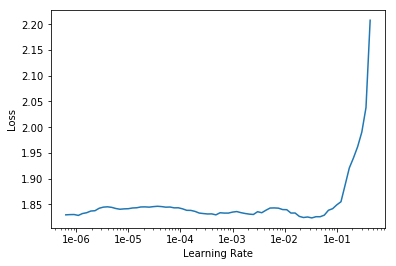

In [10]:
learn6.lr_find()
learn6.recorder.plot()

In [11]:
learn6.fit_one_cycle(5, max_lr = 1e-03, wd=0.2)

epoch,train_loss,valid_loss,accuracy,time
0,1.515075,1.514110,0.324429,04:48
1,1.509629,1.504334,0.333236,04:57
2,1.484269,1.493668,0.334100,05:27
3,1.471762,1.474224,0.347271,05:59
4,1.476732,1.456814,0.356179,06:47


In [13]:
learn6.fit_one_cycle(5, max_lr = 1e-04, wd=0.1)

epoch,train_loss,valid_loss,accuracy,time
0,1.454842,1.455812,0.356457,06:51
1,1.456634,1.454810,0.356507,06:56
2,1.465261,1.449264,0.360400,06:56
3,1.461933,1.444151,0.362771,07:00
4,1.459555,1.442537,0.364486,06:55


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


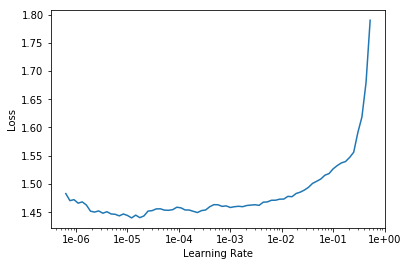

In [14]:
learn6.lr_find()
learn6.recorder.plot()

In [15]:
learn6.fit_one_cycle(5, max_lr = 1e-05/2, wd=0.1)

epoch,train_loss,valid_loss,accuracy,time
0,1.458546,1.441696,0.364950,06:56
1,1.448113,1.441431,0.365014,06:56
2,1.436418,1.442333,0.363721,06:53
3,1.454778,1.441509,0.363636,06:59
4,1.456560,1.441992,0.364693,06:51


In [31]:
test_df_6_100["label"].value_counts()

3    77501
5    76893
4    64021
2    51091
1    26138
0     4356
Name: label, dtype: int64

In [0]:
pred, _ = learn6.get_preds(ds_type = DatasetType.Test)

In [0]:
pred_list_6 = []
for i in range(len(test_df_6_100)):
  pred_list_6.append(str(int((torch.argmax(pred[i])))))

In [0]:
str_test6_list = []
test_6list = list(test_df_6_100["label"])
for i in test_6list:
  str_test6_list.append(str(i))
str_test6_list

In [46]:
for i in ["1",'2','3','4','5']:
  accu(i,pred_list_6,str_test6_list)

1的准确率是0.49282693751729045
1的召回率是0.9680541739995409
1的F值是0.653144421078412
2的准确率是0.37065258561147874
2的召回率是0.8784913194104637
2的F值是0.5213411804158914
3的准确率是0.3398897475707831
3的召回率是1.4792841382691837
3的F值是0.5527712510116882
4的准确率是0.3725242641836976
4的召回率是0.19795067243560707
4的F值是0.25852644475756376
5的准确率是0.3628957510122445
5的召回率是1.3329561858686747
5的F值是0.5704792094372519


In [47]:
accu(0,pred_list_6,str_test6_list)

ZeroDivisionError: ignored